# Lab 2- Numpy

Read through the following notebook to get an introduction to numpy: [Numpy Intro](jrjohansson-lectures/Lecture-2-Numpy.ipynb)

## Exercise 2.1

Let start with some basic reshape manipulations. Consider a classification task. We can imagine the training data X consisting of N examples each with M inputs, so the shape of X is (M,N). We usually express the output of the Neural Network, which for the training sample encodes the true class of each of the M examples in X, in a "one-hot" matrix of shape (N,C), where C is the number of classes and each row corresponds to the true class for the corresponding example in X. So for a given row Y[i], all elements are 0 except for the column corresponding to the true class.

For example consider a classification task of separating between 4 classes. We'll call them A, B, C, and D.


In [5]:
import numpy as np

Y=np.array( [ [0, 1, 0, 0], # Class B
              [1, 0, 0, 0], # Class A
              [0, 0, 1, 0], # Class C
              [0, 0, 0, 1]  # Class D
            ])

print "Shape of Y:", Y.shape

Shape of Y: (4, 4)


Lets imagine that we want to change to a 2 classes instead by combining classes A with B and C with D. Use np.reshape and np.sum to create a new vector Y1. Hint: change the shape of Y into (8,2), sum along the correct axes, and change shape to (4,2).

In [6]:
Y1= Y.reshape(8,2) # Replace Y with operations on Y which result in the requested answer. 
Y1= np.sum(Y1, axis=1)
print Y1.reshape(4, 2)

[[1 0]
 [1 0]
 [0 1]
 [0 1]]


## Exercise 2.2

Oftentimes we find that neutral networks work best when their input is mostly between 0,1. Below, we create a random dataset that is normal distributed (mean of 4, sigma of 10). Shift the data so that the mean is 0.5 and 68% of the data lies between 0 and 1.

In [7]:
X=np.random.normal(4,10,1000)
sigma = 10
mean = 4

print np.mean(X)
print np.min(X)
print np.max(X)

4.331888846486356
-26.306338344726743
33.65969391089696


New mean: 0.5


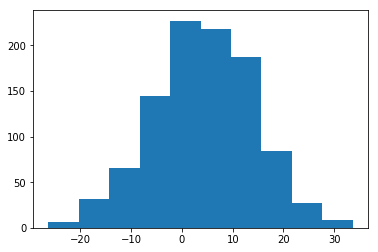

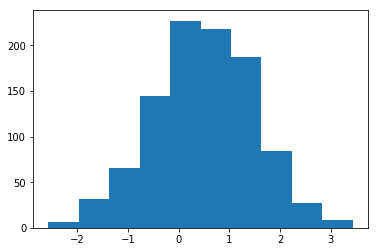

In [8]:
X_new=((X - np.mean(X))/sigma)+0.5

print "New mean: " + str(np.mean(X_new))
import matplotlib.pyplot as plt
plt.hist(X)
plt.show()
plt.hist(X_new)
plt.show()

X1=X_new # Replace X with your answer

## Exercise 2.3

Using np.random.random and np.random.normal to generate two datasets. Then use np.where to repeat exercise 1.4 showing that one creates a flat distribution and the other does not. 

Standard Deviation (intervals of 0.2), Random Distribution: 10.825894882179487


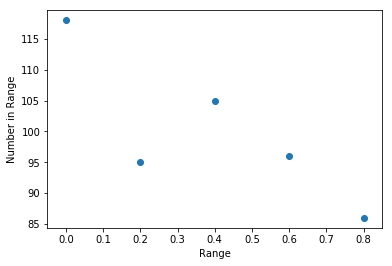

Standard Deviation (intervals of 0.2), Normal Distribution: 131.92573668545498


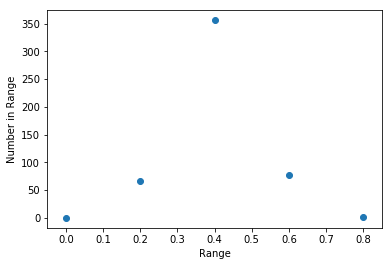

In [9]:
# Your solution here

X_random = np.random.random(500)
X_normal = np.random.normal(0.5, 0.1, 500)

data_rand = [] 
data_norm = []

for x in np.arange(0.0, 1.0, 0.2):
    y = x + 0.2
    data_rand.append(len(np.where((X_random <= y) & (X_random >= x))[0]))
    data_norm.append(len(np.where((X_normal <= y) & (X_normal >= x))[0]))

print "Standard Deviation (intervals of 0.2), Random Distribution: " + str(np.std(np.array(data_rand)))
plt.xlabel("Range")
plt.ylabel("Number in Range")
plt.scatter(np.arange(0.0, 1.0, 0.2), data_rand)
plt.show()
print "Standard Deviation (intervals of 0.2), Normal Distribution: " + str(np.std(np.array(data_norm)))
plt.xlabel("Range")
plt.ylabel("Number in Range")
plt.scatter(np.arange(0.0, 1.0, 0.2), data_norm)
plt.show()



## Exercise 2.4

Now lets play with some real data. We will load a file of example Neutrino interactions in LArTPC detector. There are 2 read out planes in the detector with 240 wires each, sampled 4096 times. Shift the images in the same way as exercise 2.2.

In [10]:
import h5py
f=h5py.File("/data/LArIAT/h5_files/nue_CC_3-1469384613.h5","r")

print f.keys()

images=f["features"]

print images.shape

[u'Eng', u'Track_length', u'enu_truth', u'features', u'lep_mom_truth', u'mode_truth', u'pdg']
(2500, 2, 240, 4096)


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
#Original Image

print("Original Image")
print images[0]

#Shifted Image

print("Shifted Image")
new_images = ((images - np.mean(images))/np.max(images)-np.min(images))+0.5
print new_images[0]

Original Image
[[[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0. -1. -1. ...  0.  0.  0.]
  ...
  [ 0.  1.  1. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [-1. -1.  0. ... -1. -1. -1.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [-1. -1. -1. ... -1. -1. -1.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]]
Shifted Image
[[[1338. 1338. 1338. ... 1338. 1338. 1338.]
  [1338. 1338. 1338. ... 1338. 1338. 1338.]
  [1338. 1338. 1338. ... 1338. 1338. 1338.]
  ...
  [1338. 1338. 1338. ... 1338. 1338. 1338.]
  [1338. 1338. 1338. ... 1338. 1338. 1338.]
  [1338. 1338. 1338. ... 1338. 1338. 1338.]]

 [[1338. 1338. 1338. ... 1338. 1338. 1338.]
  [1338. 1338. 1338. ... 1338. 1338. 1338.]
  [1338. 1338. 1338. ... 1338. 1338. 1338.]
  ...
  [1338. 1338. 1338. ... 1338. 1338. 1338.]
  [1338. 1338. 1338. ... 1338. 1338. 1338.]
  [1338. 1338. 1338. ... 1338. 1338. 1338.]]]
